## Questão 3 

Deseja-se produzir 100 kN no início da decolagem (Mach = 0) ao nível do mar (Ta =
288,2K e Pa = 101,3 kPa) usando motores turbofans com tecnologias de diferentes
décadas, conforme tabela abaixo (ponto de projeto estático ao nível do mar).

**A)** Compare a vazão de ar, consumo de combustível, consumo específico de combustível e empuxo específico (parâmetros de desempenho) na condição de projeto, estática ao nível do mar.

In [24]:
import model_reference as mf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

plt.style.use('seaborn')
warnings.filterwarnings('ignore')

values_60 = {
    'pa': 101.3,
    'ta': 288.2,
    'n_d': 0.97,
    'n_f': 0.85,
    'n_c': 0.85,
    'n_b': 1.0,
    'n_t': 0.9,
    'n_tf': 0.9,
    'n_n': 0.98,
    'n_nf': 0.98,
    'gamma_d': 1.4,
    'gamma_f': 1.4,
    'gamma_c': 1.37,
    'gamma_b': 1.35,
    'gamma_t': 1.33,
    'gamma_tf': 1.33,
    'gamma_n': 1.36,
    'gamma_nf': 1.40,
    'prc': 10,          # Razão de pressão do compressor
    'prf': 1.5,         # Razão de pressão do fan
    'bypass_ratio': 2,  # B
    'pc_fuel': 45000,
    'cp_fuel': 1.110,
    'r': 288.3,
    't04': 1323,          # T04  
    'mach': 0,
    'mass_flow': 266.45, # Vazão mássica (fluxo de massa)
    }

turbofan_60 = mf.TurboFan(values_60)
performance_results_60 = turbofan_60.sumarise_results()
thermodynamic_results_60 = turbofan_60.sumarise()

# Criação de dataframe que contém os valores de interesse para todos os motores (adicionando o primeiro motor)
performance_results = performance_results_60.loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust'], : ]
performance_results = performance_results.rename({1: '60/70'}, axis=1)

performance_results


,60/70
hot_mass_flow,88.779348
fuel_consumption,1.490687
TSFC,0.014907
specific_thrust,1.126390


In [25]:
turbofan_60.sumarise()

,1
bypass_ratio,2.000000
cp_comb,1.110000
f,0.016791
gamma_b,1.350000
gamma_c,1.370000
gamma_d,1.400000
gamma_f,1.400000
gamma_n,1.360000
gamma_nf,1.400000
gamma_t,1.330000


In [26]:
values_70 = values_60.copy()
values_70.update({'t04': 1523,'bypass_ratio':4,'prc':16.67,'mass_flow':306.150})

turbofan_70 = mf.TurboFan(values_70)
performance_results_70 = turbofan_70.sumarise_results()
thermodynamic_results_70 = turbofan_70.sumarise()

# Adição do segundo motor ao dataset geral
performance_results['70/80'] = performance_results_70.loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust'], : ]

performance_results_70

,1
TSFC,0.011789
cold_mass_flow,244.817090
cold_specific_thrust,1068.526457
fuel_consumption,1.178898
hot_mass_flow,61.204272
hot_specific_thrust,565.391856
mass_flow,306.021362
specific_thrust,1.633918
thrust_total,100.002782


In [27]:
values_80 = values_60.copy()
values_80.update({'t04': 1623,'bypass_ratio':5,'prc':21.33, 'mass_flow': 318.351})

turbofan_80 = mf.TurboFan(values_80)
performance_results_80= turbofan_80.sumarise_results()
thermodynamic_results_80= turbofan_80.sumarise()

# Adição do terceiro motor ao dataset geral
performance_results['80/90'] = performance_results_80.loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust'], : ]

performance_results_80

,1
TSFC,0.010825
cold_mass_flow,265.181030
cold_specific_thrust,1335.658071
fuel_consumption,1.082636
hot_mass_flow,53.036206
hot_specific_thrust,550.010695
mass_flow,318.217236
specific_thrust,1.885669
thrust_total,100.008717


In [28]:
values_90 = values_60.copy()
values_90.update({'t04': 1823,'bypass_ratio':8,'prc':24,'mass_flow':343.350})

turbofan_90 = mf.TurboFan(values_90)
performance_results_90 = turbofan_90.sumarise_results()
thermodynamic_results_90 = turbofan_90.sumarise()

# Adição do quarto motor ao dataset geral
performance_results['90/00'] = performance_results_90.loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust'], : ]

performance_results_90

,1
TSFC,0.009511
cold_mass_flow,305.071761
cold_specific_thrust,2137.052914
fuel_consumption,0.951173
hot_mass_flow,38.133970
hot_specific_thrust,485.358135
mass_flow,343.205732
specific_thrust,2.622411
thrust_total,100.002945


In [29]:
values_00 = values_60.copy()
values_00.update({'t04': 1973,'bypass_ratio':10,'prc':32,'mass_flow':356.221})

turbofan_00 = mf.TurboFan(values_00)
performance_results_00 = turbofan_00.sumarise_results()
thermodynamic_results_00 = turbofan_00.sumarise()

# Adição do quinto motor ao dataset geral
performance_results['00/10'] = performance_results_00.loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust'], : ]

performance_results_00

,1
TSFC,0.008743
cold_mass_flow,323.701203
cold_specific_thrust,2671.316143
fuel_consumption,0.874363
hot_mass_flow,32.370120
hot_specific_thrust,418.075133
mass_flow,356.071324
specific_thrust,3.089391
thrust_total,100.003967


In [30]:
performance_results

,60/70,70/80,80/90,90/00,00/10
hot_mass_flow,88.779348,61.204272,53.036206,38.133970,32.370120
fuel_consumption,1.490687,1.178898,1.082636,0.951173,0.874363
TSFC,0.014907,0.011789,0.010825,0.009511,0.008743
specific_thrust,1.126390,1.633918,1.885669,2.622411,3.089391


In [31]:
performance_results.transpose()

,hot_mass_flow,fuel_consumption,TSFC,specific_thrust
60/70,88.779348,1.490687,0.014907,1.126390
70/80,61.204272,1.178898,0.011789,1.633918
80/90,53.036206,1.082636,0.010825,1.885669
90/00,38.133970,0.951173,0.009511,2.622411
00/10,32.370120,0.874363,0.008743,3.089391


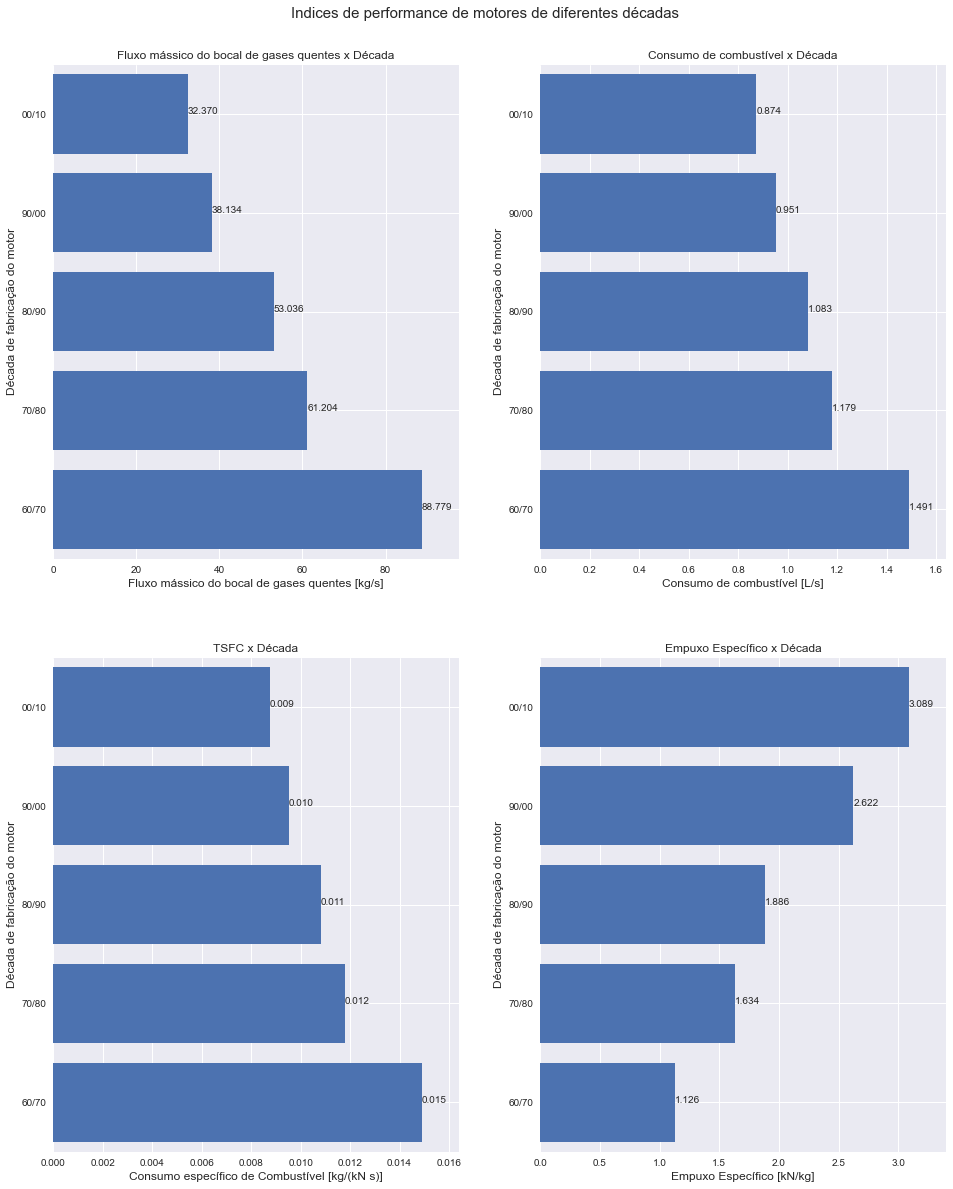

In [32]:
aux=0
cols = 2
rows = 2
fontsize_label = 12 
fontsize_title = 15

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16,20))


fig.suptitle('Indices de performance de motores de diferentes décadas',fontsize=fontsize_title, y=0.92)#, fontsize=30)

# Definicão dos títulos e indices dos gráficos
titulos=['Fluxo mássico do bocal de gases quentes x Década','Consumo de combustível x Década','TSFC x Década','Empuxo Específico x Década']
ylabels=['Fluxo mássico do bocal de gases quentes [kg/s]','Consumo de combustível [L/s]','Consumo específico de Combustível [kg/(kN s)]','Empuxo Específico [kN/kg]']

for i in range(0,rows):
    for j in range(0,cols):
        plt.sca(ax[i,j])
        ax[i,j].set_ylabel('Década de fabricação do motor',fontsize=fontsize_label)
        ax[i,j].set_xlabel(ylabels[aux],fontsize=fontsize_label)
        bars = plt.barh(['60/70','70/80','80/90','90/00','00/10'],performance_results.iloc[aux])
        #[xmin xmax ymin ymax]
        plt.axis([0, max(performance_results.iloc[aux])*1.1,-0.5 , 4.5])
        plt.title(titulos[aux])
        for  bar in bars:
            width = bar.get_width()
            label_y = bar.get_y() + bar.get_height() / 2
            plt.text(width, label_y, s=f'{width:.3f}')
        aux += 1

In [33]:
fig.savefig('images/questao3/itemA.jpg',
            format='jpeg',
            dpi=200,
            bbox_inches='tight')

A partir dos dados é possível concluir que houve um aumento da eficiência na geração de empuxo ao modernizar os motores turbofan. Isso pode ser confirmado quando verificado que para um mesmo valor de empuxo (nesse exercício o empuxo total gerado foi de 100kN) menores valores de consumo de combustível específico e maiores valores do empuxo específico são obtidos a medida em que são analisados motores de décadas subsequentes.
 
Ademais é possível constatar a diminuição do fluxo mássico de gases quentes a medida que se avança em gerações subsequentes de motores turbofan. Que pode ser explicado pelos seguintes fatores:
- Aumento da razão de passagem é possibilitado um aumento na geração do empuxo sem a necessidade de aumento da vazão mássica que adentra o interior do motor; 
- Aumento da razão de pressão do compressor possibilitando que um menor fluxo mássico de ar de gases quentes seja capaz de produzir uma quantidade maior de empuxo.

**B)** Ainda na condição estática e ao nível do mar, varie a rotação até 70% de N2 e
compare como cada motor se comporta sobre os parâmetros de desempenho e
empuxo em valores absolutos e normalizados pela condição de 100% de N2.

In [34]:
# Inicializando dataframe do exercício já com resultados para n2= 1 (100% rotacao)
performance_results_3b = performance_results.copy(deep=True)
performance_results_3b.loc['n2'] = [1,1,1,1,1]
performance_results_3b

,60/70,70/80,80/90,90/00,00/10
hot_mass_flow,88.779348,61.204272,53.036206,38.133970,32.370120
fuel_consumption,1.490687,1.178898,1.082636,0.951173,0.874363
TSFC,0.014907,0.011789,0.010825,0.009511,0.008743
specific_thrust,1.126390,1.633918,1.885669,2.622411,3.089391
n2,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
performance_list= []
for i in np.linspace(1.0,0.7,10):
    # Setando nova rotação em n2
    turbofan_60.set_n2(i)
    turbofan_70.set_n2(i)
    turbofan_80.set_n2(i)
    turbofan_90.set_n2(i)
    turbofan_00.set_n2(i)

    # Atualizando o dataframe com novos resultados
    performance_results_3b['60/70'] = turbofan_60.sumarise_results().loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust'], : ]
    performance_results_3b['70/80'] = turbofan_70.sumarise_results().loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust'], : ]
    performance_results_3b['80/90'] = turbofan_80.sumarise_results().loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust'], : ]
    performance_results_3b['90/00'] = turbofan_90.sumarise_results().loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust'], : ]
    performance_results_3b['00/10'] = turbofan_00.sumarise_results().loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust'], : ]
    performance_results_3b.loc['n2']=[i,i,i,i,i]
    
    # Adicionando os resultados na listas de dataframes
    performance_list.append(performance_results_3b.copy(deep=True))

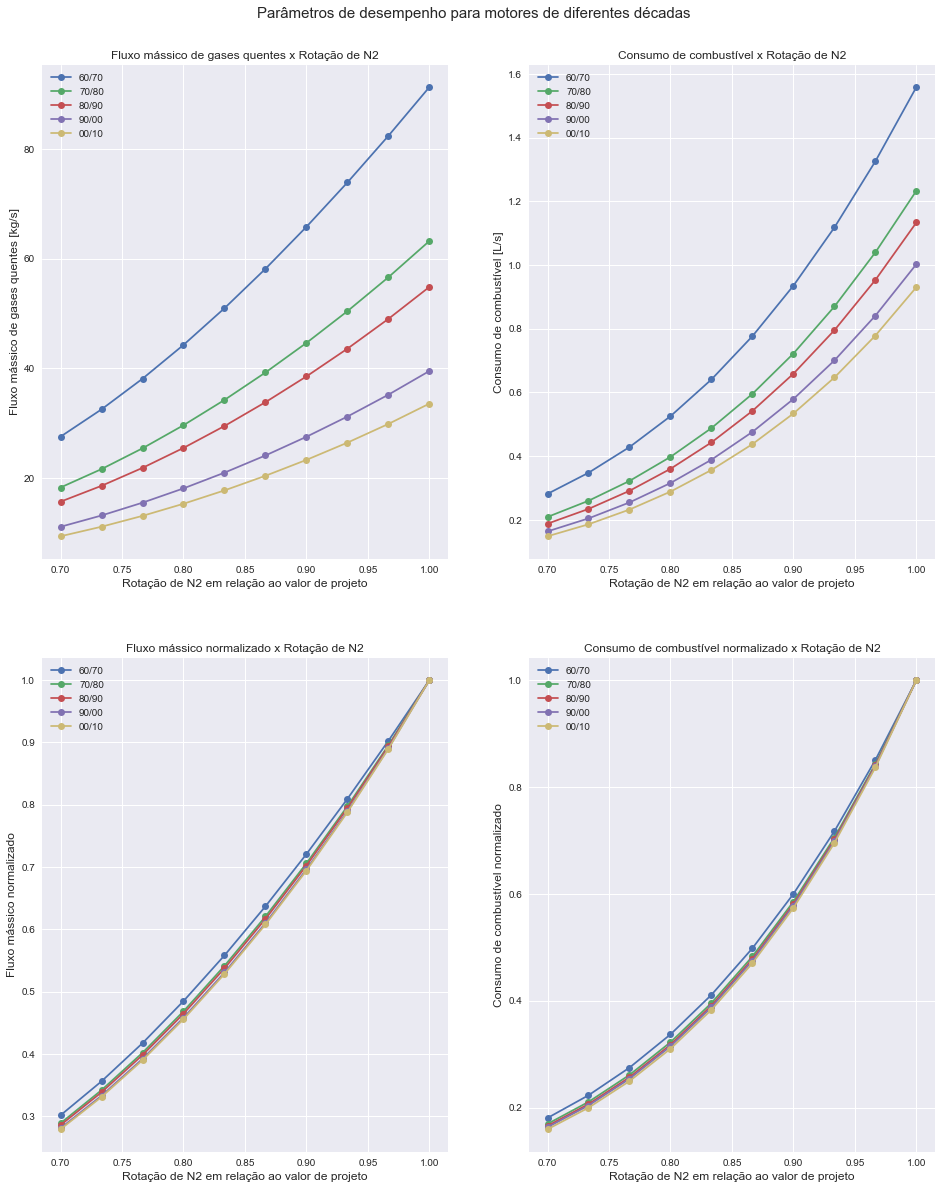

In [36]:
cols = 2
rows = 2
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16,20))

fig.suptitle('Parâmetros de desempenho para motores de diferentes décadas',fontsize=fontsize_title, y=0.92)#, fontsize=30)

# Definicão dos títulos e indices dos gráficos
titulos=['Fluxo mássico de gases quentes x Rotação de N2','Consumo de combustível x Rotação de N2','Fluxo mássico normalizado x Rotação de N2','Consumo de combustível normalizado x Rotação de N2']
ylabels=['Fluxo mássico de gases quentes [kg/s]','Consumo de combustível [L/s]','Fluxo mássico normalizado','Consumo de combustível normalizado']
labels = ['60/70','70/80','80/90','90/00','00/10']

aux = 0
i=0
for j in range(0,cols):
    plt.sca(ax[i,j])
    ax[i,j].set_xlabel('Rotação de N2 em relação ao valor de projeto',fontsize=fontsize_label)
    ax[i,j].set_ylabel(ylabels[aux],fontsize=fontsize_label)
    for k in range(0,5):
        plt.plot(np.linspace(1.0,0.7,10),
        [performance_list[0][labels[k]].iloc[aux],
        performance_list[1][labels[k]].iloc[aux],
        performance_list[2][labels[k]].iloc[aux],
        performance_list[3][labels[k]].iloc[aux],
        performance_list[4][labels[k]].iloc[aux],
        performance_list[5][labels[k]].iloc[aux],
        performance_list[6][labels[k]].iloc[aux],
        performance_list[7][labels[k]].iloc[aux],
        performance_list[8][labels[k]].iloc[aux],
        performance_list[9][labels[k]].iloc[aux]],label= labels[k], marker='o')
    plt.title(titulos[aux])
    plt.legend()
    aux += 1
i = 1
aux = 0
for j in range(0,cols):
    plt.sca(ax[i,j])
    ax[i,j].set_xlabel('Rotação de N2 em relação ao valor de projeto',fontsize=fontsize_label)
    ax[i,j].set_ylabel(ylabels[aux+2],fontsize=fontsize_label)
    for k in range(0,5):
        plt.plot(np.linspace(1.0,0.7,10),
        [performance_list[0][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[1][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[2][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[3][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[4][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[5][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[6][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[7][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[8][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[9][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux]],label= labels[k], marker='o')
    plt.title(titulos[aux+2])
    plt.legend()
    aux += 1


In [37]:
fig.savefig('images/questao3/itemB_1.jpg',
            format='jpeg',
            dpi=200,
            bbox_inches='tight')

 Dos gráficos é possível constatar a diminuição do fluxo mássico dos gases quentes a medida em que se diminui a velocidade de rotação do compressor (N2), uma vez que é diminuido a vazão de massa de ar que adentra o motor. Também é identificada a redução do consumo de combustível uma vez que se faz necessário menor quantidade de combustível para a mistura ótima de ar-combustível para a rotação de N2. Como resultado dos avanços tecnológicos percebe-se a diminuição do consumo de combustível e de vazão mássica de gases quentes nos motores de gerações mais recentes. 

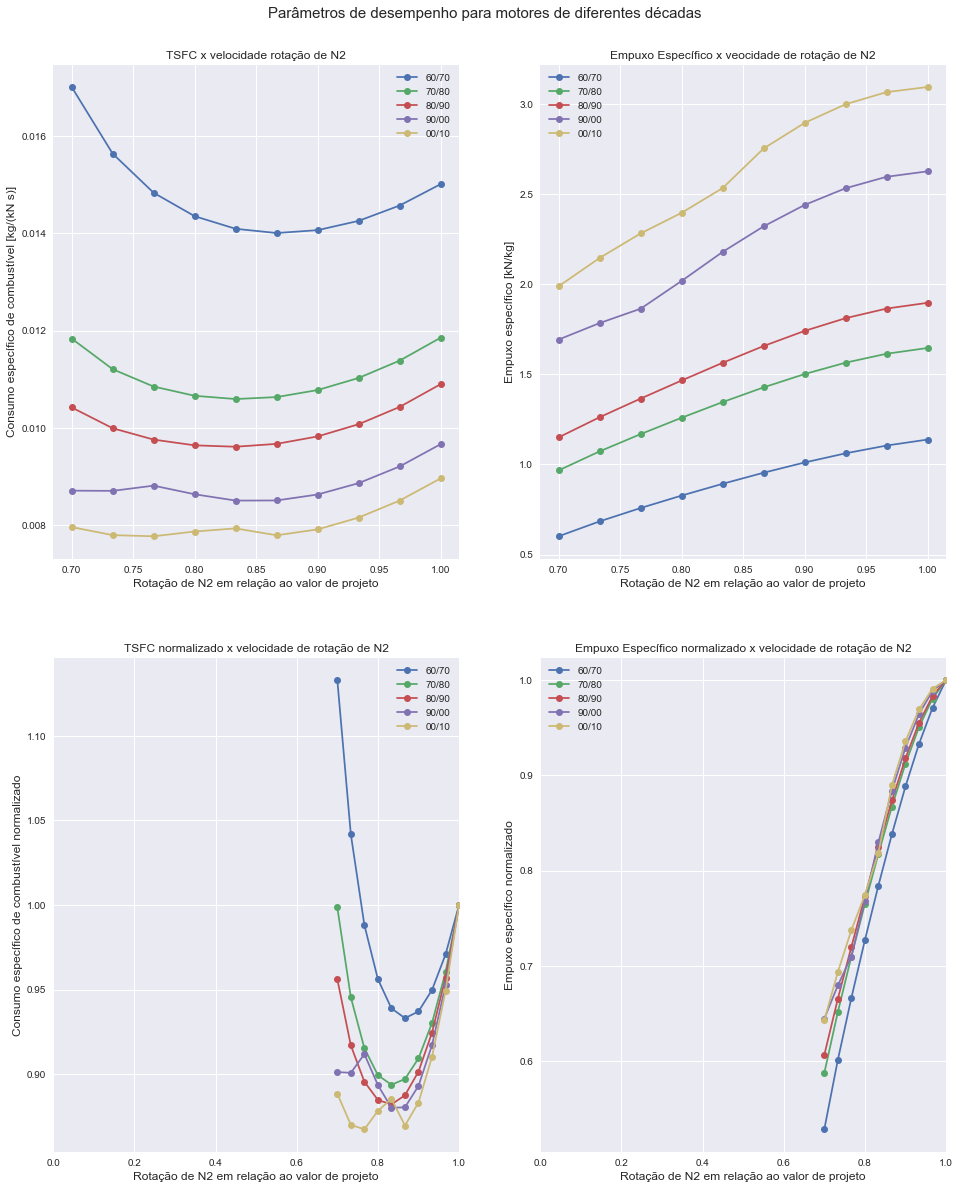

In [38]:
cols = 2
rows = 2
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16,20))

fig.suptitle('Parâmetros de desempenho para motores de diferentes décadas',fontsize=fontsize_title, y=0.92)
# Definicão dos títulos e indices dos gráficos
titulos=['TSFC x velocidade rotação de N2','Empuxo Específico x veocidade de rotação de N2','TSFC normalizado x velocidade de rotação de N2','Empuxo Específico normalizado x velocidade de rotação de N2']
ylabels=['Consumo específico de combustível [kg/(kN s)]','Empuxo específico [kN/kg]','Consumo específico de combustível normalizado','Empuxo específico normalizado']
labels = ['60/70','70/80','80/90','90/00','00/10']

aux = 2
i=0
for j in range(0,cols):
    plt.sca(ax[i,j])
    ax[i,j].set_xlabel('Rotação de N2 em relação ao valor de projeto',fontsize=fontsize_label)
    ax[i,j].set_ylabel(ylabels[aux-2],fontsize=fontsize_label)
    for k in range(0,5):
        plt.plot(np.linspace(1.0,0.7,10),
        [performance_list[0][labels[k]].iloc[aux],
        performance_list[1][labels[k]].iloc[aux],
        performance_list[2][labels[k]].iloc[aux],
        performance_list[3][labels[k]].iloc[aux],
        performance_list[4][labels[k]].iloc[aux],
        performance_list[5][labels[k]].iloc[aux],
        performance_list[6][labels[k]].iloc[aux],
        performance_list[7][labels[k]].iloc[aux],
        performance_list[8][labels[k]].iloc[aux],
        performance_list[9][labels[k]].iloc[aux]],label= labels[k], marker='o')
    plt.title(titulos[aux-2])
    plt.legend()
    aux += 1
i = 1
aux = 2
for j in range(0,cols):
    plt.sca(ax[i,j])
    ax[i,j].set_xlabel('Rotação de N2 em relação ao valor de projeto',fontsize=fontsize_label)
    ax[i,j].set_ylabel(ylabels[aux],fontsize=fontsize_label)
    ax[i,j].set_xlim(0,1)
    
    for k in range(0,5):
        plt.plot(np.linspace(1.0,0.7,10),
        [performance_list[0][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[1][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[2][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[3][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[4][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[5][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[6][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[7][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[8][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux],
        performance_list[9][labels[k]].iloc[aux]/performance_list[0][labels[k]].iloc[aux]],label= labels[k], marker='o')
    plt.title(titulos[aux])
    plt.legend()
    aux += 1

In [39]:
fig.savefig('images/questao3/itemB_2.jpg',
            format='jpeg',
            dpi=200,
            bbox_inches='tight')

Tendo como base os resultados obtidos é possível identificar o aumento do empuxo específico a medida em que se compara os motores turbofan de diferentes décadas, sendo o mais recente aquele que apresenta maior valor. Á proporção em que se diminui a velocidade de rotação do compressor (N2) é possível identificar a redução do empuxo devido ao distanciamento do ponto de projeto;

Ainda é notável a redução do consumo de combustível específico (TSFC) nas gerações mais recentes de motores. Ademais se percebe uma relação não linear entre a velocidade de rotação de compressor e TSFC com mínimo próximo ao valor de 85% da rotação N2 de projeto. Isso está relacionado as taxas de queda do empuxo específico e da razão combustível-ar: inicialmente para maiores rotações de N2 há uma queda mais acentuada da razão combustível-ar e menos acentuada do empuxo específico o que faz com que seja reduzido TSFC; porém, a partir de um certo valor de rotação do compressor (aproximadamente N2 igual a 85% do valor de projeto) o empuxo específico passa a apresentar uma taxa de queda maior que a da razão combustível-ar fazendo com que o TSFC aumente.  

Porém, para os modelos de motores turbofan que apresentam alta razão de passagem (B>5) é percebido tanto no gráfico de empuxo específico x velocidade de rotação de N2 quanto de TSFC x velocidade de rotação de N2 pontos que indicam uma leve mudança de comportamento. Esses pontos revelam uma limitação no modelo para representar o comportamento de motores com alta razão de passagem. Ao qual está relacionada a ... . 

**C)** Pensando no voo de cruzeiro a Mach 0,85 e 12.200m ((Ta = 216,7K e Pa =
18,75 kPa) e que os motores operam a 85% de N2, calcule os parâmetros de
desempenho anteriores, somando-se a eles o empuxo gerado.

In [40]:
values_60.update({'mach': 0.85, 'pa': 18.75,'ta': 216.7})
values_70.update({'mach': 0.85, 'pa': 18.75,'ta': 216.7})
values_80.update({'mach': 0.85, 'pa': 18.75,'ta': 216.7})
values_90.update({'mach': 0.85, 'pa': 18.75,'ta': 216.7})
values_00.update({'mach': 0.85, 'pa': 18.75,'ta': 216.7})

# Atualizando objetos com os valores do problema
turbofan_60 = mf.TurboFan(values_60)
turbofan_70 = mf.TurboFan(values_70)
turbofan_80 = mf.TurboFan(values_80)
turbofan_90 = mf.TurboFan(values_90)
turbofan_00 = mf.TurboFan(values_00)

# Setando a rotação de N2 para 85%
turbofan_60.set_n2(0.85)
turbofan_70.set_n2(0.85)
turbofan_80.set_n2(0.85)
turbofan_90.set_n2(0.85)
turbofan_00.set_n2(0.85)

In [41]:
turbofan_60.sumarise_results()

,0.85
TSFC,0.025701
cold_mass_flow,32.323857
cold_specific_thrust,142.063205
fuel_consumption,0.201038
hot_mass_flow,13.414822
hot_specific_thrust,441.039259
mass_flow,45.738678
specific_thrust,0.583102
thrust_total,7.822216


In [42]:
# Inicializando dataframe do exercício 
performance_results_3c = performance_results.copy(deep=True)


performance_results_3c.loc['thrust_total'] = [0,0,0,0,0]
performance_results_3c['60/70'] = turbofan_60.sumarise_results().loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust','thrust_total'], : ]
performance_results_3c['70/80'] = turbofan_70.sumarise_results().loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust','thrust_total'], : ]
performance_results_3c['80/90'] = turbofan_80.sumarise_results().loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust','thrust_total'], : ]
performance_results_3c['90/00'] = turbofan_90.sumarise_results().loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust','thrust_total'], : ]
performance_results_3c['00/10'] = turbofan_00.sumarise_results().loc[['hot_mass_flow', 'fuel_consumption', 'TSFC', 'specific_thrust','thrust_total'], : ]
performance_results_3c.loc['n2'] = [0.85,0.85,0.85,0.85,0.85]

performance_results_3c

,60/70,70/80,80/90,90/00,00/10
hot_mass_flow,13.414822,9.031178,7.780282,5.540318,4.686511
fuel_consumption,0.201038,0.154346,0.140743,0.120804,0.110923
TSFC,0.025701,0.022476,0.021295,0.020009,0.019135
specific_thrust,0.583102,0.760379,0.849463,1.089748,1.236935
thrust_total,7.822216,6.867119,6.609062,6.037550,5.796910
n2,0.850000,0.850000,0.850000,0.850000,0.850000


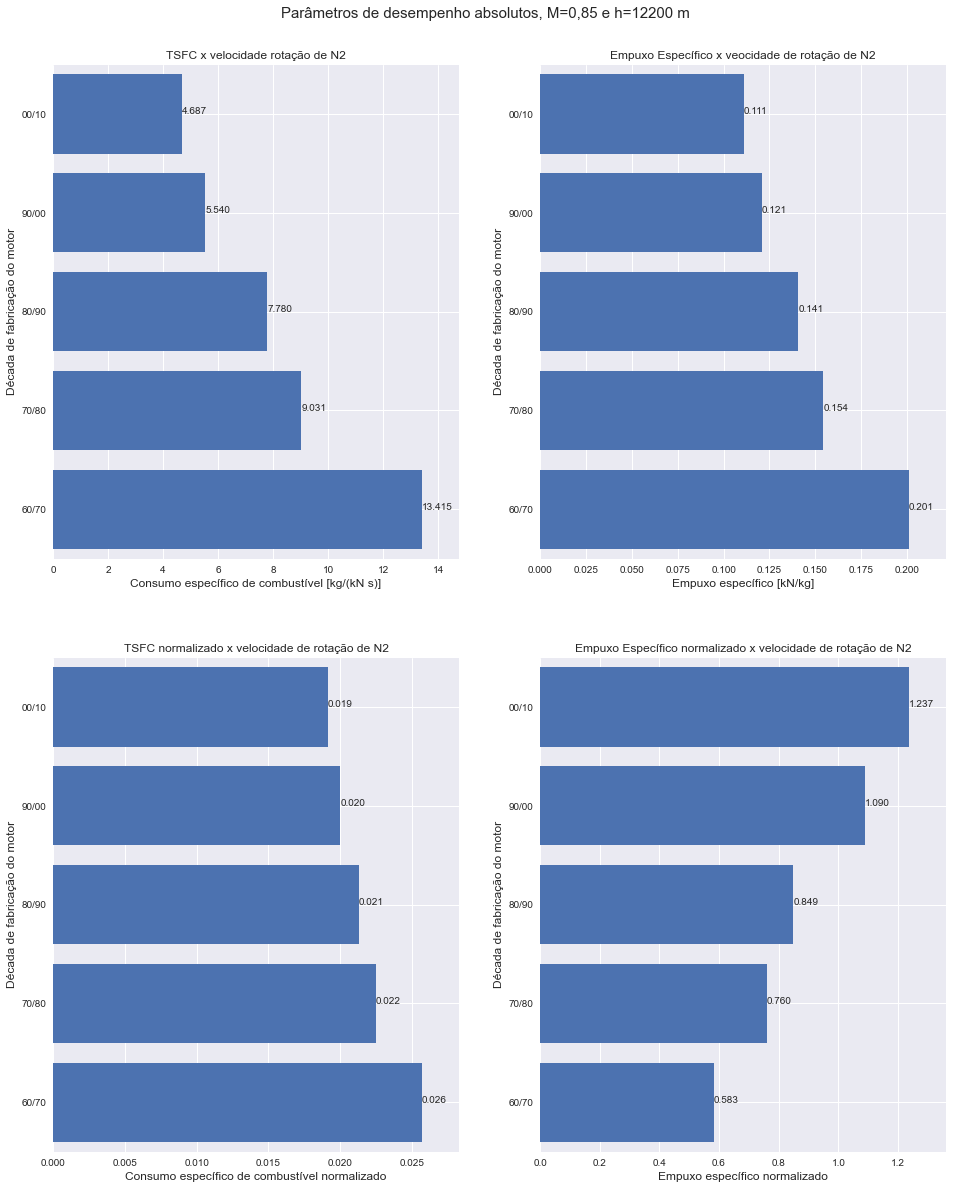

In [43]:
aux=0
cols = 2
rows = 2
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16,20))

fig.suptitle('Parâmetros de desempenho absolutos, M=0,85 e h=12200 m',fontsize=fontsize_title, y=0.92)#, fontsize=30)

for i in range(0,rows):
    for j in range(0,cols):
        plt.sca(ax[i,j])
        ax[i,j].set_ylabel('Década de fabricação do motor',fontsize=fontsize_label)
        ax[i,j].set_xlabel(ylabels[aux],fontsize=fontsize_label)
        bars = plt.barh(['60/70','70/80','80/90','90/00','00/10'],performance_results_3c.iloc[aux])
        #[xmin xmax ymin ymax]
        plt.axis([0, max(performance_results_3c.iloc[aux])*1.1,-0.5 , 4.5])
        plt.title(titulos[aux])
        for  bar in bars:
            width = bar.get_width()
            label_y = bar.get_y() + bar.get_height() / 2
            plt.text(width, label_y, s=f'{width:.3f}')
        aux += 1

In [44]:
fig.savefig('images/questao3/itemC_1.jpg',
            format='jpeg',
            dpi=200,
            bbox_inches='tight')

Text(0.5, 0, 'Empuxo resultante [kN]')

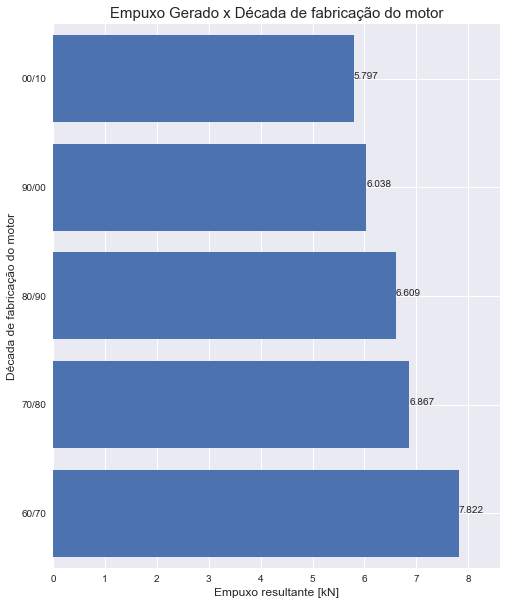

In [45]:
#fig, ax =plt.subplots()

fig = plt.figure(figsize=(8,10))
bars = plt.barh(['60/70', '70/80', '80/90', '90/00', '00/10'],
                performance_results_3c.loc['thrust_total'])
plt.axis([0, max(performance_results_3c.loc['thrust_total'])*1.1, -0.5, 4.5])
for bar in bars:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width:.3f}')

plt.title('Empuxo Gerado x Década de fabricação do motor', fontsize=fontsize_title)
plt.ylabel('Década de fabricação do motor', fontsize = fontsize_label)
plt.xlabel('Empuxo resultante [kN]', fontsize = fontsize_label)

In [46]:
fig.savefig('images/questao3/itemC_2.jpg',
            format='jpeg',
            dpi=200,
            bbox_inches='tight')

Com o aumento da altitude de vôo é possível identificar um aumento do TSFC e diminuição do empuxo específico, o que é consequência da queda de massa específica do ar e do fluxo de quantidade de movimento na entrada do motor (que é acrescido com a razão de passagem e velocidade de voo). Este último é diminuido do empuxo gerado pela exaustão dos gases nas saídas dos bocais.

A redução verificada na vazão mássica de gases quentes é consequência direta da diminuição da vazão da massa de ar que entra no motor que por sua vez é resultado da diminuição da massa específica do ar atmosférico em maiores altitudes. 

Similarmente ao verificado no item a) ocorre a diminuição do consumo de combústivel uma vez que há menor necessidade de sua injeção na mistura ar-combustível.

Em relação ao empuxo gerado nas condições de vôo em cruzeiro é possível notar que há uma redução do seu valor quando comparado com o valor verificado em condições á nível do mar. Além disso os motores mais recentes necessitam gerar menos empuxo para manter a aeronave nas condições de vôo de cruzeiro o que corrobora com a maior eficiência de gerações mais novas de motores.

